# Data and common observations

In [16]:
import ira
import seaborn as sns
%alphalab light
%run ./CryptoCorrUtils.ipynb

(c) 2017, AppliedAlpha Infrastructure for Quantitative Research and Analysis, ver. master: 0.975


Now load historical data from blockchain.com and historcal OHLC data from coindesk. Coindesk will be used only for referenced OHLC bars charts and for all calculations we will use only blockchanin's data.

In [17]:
# blockchain data: only 6 years to avoid free api limits
bcd = load_blockchain_data(timespan='6years')

# coindesk OHLC for charting (from 2013 till now)
bcd_bar = load_coindesk_ohlc()

 > Loading [market-price] ...
 > Loading [trade-volume] ...
 > Loading [n-transactions] ...
 > Loading [n-unique-addresses] ...
 > Loading [output-volume] ...
 > Loading [estimated-transaction-volume-usd] ...
 > Loading [estimated-transaction-volume] ...
 > Loading [miners-revenue] ...
 > Loading [utxo-count] ...


Take a look at correlations between series (two tables: left is Pearson correlation and right one is Spearman)

In [3]:
b0 = bcd.drop(columns=['close'])
b0['close'] = bcd.close
pd.concat((b0.corr(method='pearson'), 
           b0.corr(method='spearman')), 
          axis=1, keys=['/ / / / / / Pearson / / / / / / ', 
                        '/ / / / / / Spearman / / / / / / '])

/ / / / / / Pearson / / / / / /                                  \
                                       volume tr_per_day uniq_addr outvolume   
volume                               1.000000   0.447915  0.563525  0.022381   
tr_per_day                           0.447915   1.000000  0.970550  0.206344   
uniq_addr                            0.563525   0.970550  1.000000  0.172205   
outvolume                            0.022381   0.206344  0.172205  1.000000   
e_tr_vol_usd                         0.878476   0.593352  0.706416  0.066974   
e_tr_vol                            -0.005052   0.383383  0.291073  0.356932   
revenue                              0.858600   0.505092  0.639670 -0.003623   
utxo_count                           0.528430   0.901435  0.934637  0.119828   
close                                0.842210   0.520347  0.651339 -0.009166   

                                                                    \
             e_tr_vol_usd  e_tr_vol   revenue utxo_count     close   
volume           0.878476 -0.005052  0.858600   0.528430  0.842210   
tr_per_day       0.593352  0.383383  0.505092   0.901435  0.520347   
uniq_addr        0.706416  0.291073  0.639670   0.934637  0.651339   
outvolume        0.066974  0.356932 -0.003623   0.119828 -0.009166   
e_tr_vol_usd     1.000000  0.096697  0.928829   0.636284  0.901081   
e_tr_vol         0.096697  1.000000 -0.106451   0.187642 -0.133706   
revenue          0.928829 -0.106451  1.000000   0.630743  0.978535   
utxo_count       0.636284  0.187642  0.630743   1.000000  0.688552   
close            0.901081 -0.133706  0.978535   0.688552  1.000000   

             / / / / / / Spearman / / / / / /                                  \
                                        volume tr_per_day uniq_addr outvolume   
volume                                1.000000   0.718123  0.782347  0.333629   
tr_per_day                            0.718123   1.000000  0.973132  0.585776   
uniq_addr                             0.782347   0.973132  1.000000  0.518062   
outvolume                             0.333629   0.585776  0.518062  1.000000   
e_tr_vol_usd                          0.908855   0.862717  0.903635  0.455445   
e_tr_vol                              0.161929   0.407341  0.308255  0.771955   
revenue                               0.831555   0.613785  0.704808  0.117706   
utxo_count                            0.808560   0.900615  0.950060  0.390922   
close                                 0.841408   0.736354  0.805881  0.203557   

                                                                    
             e_tr_vol_usd  e_tr_vol   revenue utxo_count     close  
volume           0.908855  0.161929  0.831555   0.808560  0.841408  
tr_per_day       0.862717  0.407341  0.613785   0.900615  0.736354  
uniq_addr        0.903635  0.308255  0.704808   0.950060  0.805881  
outvolume        0.455445  0.771955  0.117706   0.390922  0.203557  
e_tr_vol_usd     1.000000  0.259140  0.854269   0.917640  0.915553  
e_tr_vol         0.259140  1.000000 -0.138390   0.144901 -0.075528  
revenue          0.854269 -0.138390  1.000000   0.755254  0.950814  
utxo_count       0.917640  0.144901  0.755254   1.000000  0.852329  
close            0.915553 -0.075528  0.950814   0.852329  1.000000

We see that raw series are correlated, for instance close (BTC daily close price) correlates to volume. Even more we can see that correlations are kept for lagged series.
So Price[t] correlates to Volume[t-1].

In [4]:
b1 = bcd.drop(columns=['close'])
b1['close'] = bcd.close.shift(-1)
pd.concat((b1.corr(method='pearson'), 
           b1.corr(method='spearman')), 
          axis=1, keys=['/ / / / / / Pearson / / / / / / ', 
                        '/ / / / / / Spearman / / / / / / '])

/ / / / / / Pearson / / / / / /                                  \
                                       volume tr_per_day uniq_addr outvolume   
volume                               1.000000   0.447915  0.563525  0.022381   
tr_per_day                           0.447915   1.000000  0.970550  0.206344   
uniq_addr                            0.563525   0.970550  1.000000  0.172205   
outvolume                            0.022381   0.206344  0.172205  1.000000   
e_tr_vol_usd                         0.878476   0.593352  0.706416  0.066974   
e_tr_vol                            -0.005052   0.383383  0.291073  0.356932   
revenue                              0.858600   0.505092  0.639670 -0.003623   
utxo_count                           0.528430   0.901435  0.934637  0.119828   
close                                0.842614   0.522585  0.653431 -0.007850   

                                                                    \
             e_tr_vol_usd  e_tr_vol   revenue utxo_count     close   
volume           0.878476 -0.005052  0.858600   0.528430  0.842614   
tr_per_day       0.593352  0.383383  0.505092   0.901435  0.522585   
uniq_addr        0.706416  0.291073  0.639670   0.934637  0.653431   
outvolume        0.066974  0.356932 -0.003623   0.119828 -0.007850   
e_tr_vol_usd     1.000000  0.096697  0.928829   0.636284  0.900533   
e_tr_vol         0.096697  1.000000 -0.106451   0.187642 -0.131390   
revenue          0.928829 -0.106451  1.000000   0.630743  0.976388   
utxo_count       0.636284  0.187642  0.630743   1.000000  0.688698   
close            0.900533 -0.131390  0.976388   0.688698  1.000000   

             / / / / / / Spearman / / / / / /                                  \
                                        volume tr_per_day uniq_addr outvolume   
volume                                1.000000   0.718123  0.782347  0.333629   
tr_per_day                            0.718123   1.000000  0.973132  0.585776   
uniq_addr                             0.782347   0.973132  1.000000  0.518062   
outvolume                             0.333629   0.585776  0.518062  1.000000   
e_tr_vol_usd                          0.908855   0.862717  0.903635  0.455445   
e_tr_vol                              0.161929   0.407341  0.308255  0.771955   
revenue                               0.831555   0.613785  0.704808  0.117706   
utxo_count                            0.808560   0.900615  0.950060  0.390922   
close                                 0.841790   0.736380  0.805910  0.206051   

                                                                    
             e_tr_vol_usd  e_tr_vol   revenue utxo_count     close  
volume           0.908855  0.161929  0.831555   0.808560  0.841790  
tr_per_day       0.862717  0.407341  0.613785   0.900615  0.736380  
uniq_addr        0.903635  0.308255  0.704808   0.950060  0.805910  
outvolume        0.455445  0.771955  0.117706   0.390922  0.206051  
e_tr_vol_usd     1.000000  0.259140  0.854269   0.917640  0.915440  
e_tr_vol         0.259140  1.000000 -0.138390   0.144901 -0.072593  
revenue          0.854269 -0.138390  1.000000   0.755254  0.950144  
utxo_count       0.917640  0.144901  0.755254   1.000000  0.852410  
close            0.915440 -0.072593  0.950144   0.852410  1.000000

# Split series into intervals

Now we will try to split price series into some significant intervals. We can do that by finding price 'reversal' points (points when price changes it's directon).
Then we calculate price slopes on these intervals normilized to range (-5, 5 with step 0.5). 
Next step we use found reversal points and will find slopes on other series from blockchain.com and then test how slopes on preceding intervals correlate with price actions.

To demonstrate splitting we select small interval (~ 3 months) and plot OHLC charts and price intervals.

<font color='red'>[2018-08-31]: there were found some issues with splitter. Now it's fixed and report is rebuilt</font>

 -[:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::]-


Text(0.5,1,'Split of price series')

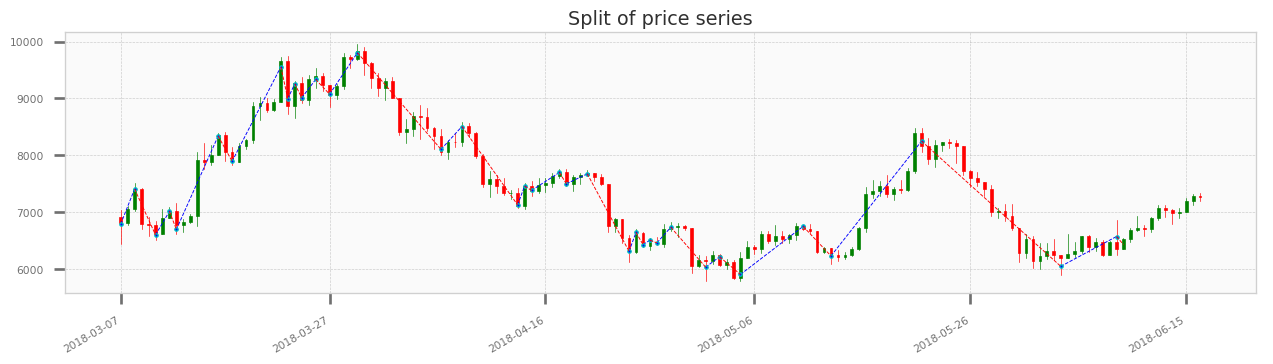

In [60]:
prices = bcd['2018-04-01':].close
trends = find_movements(prices, threshold=np.inf, t_window=np.inf, pcntg=0.2, drop_weekends_crossings=False, result_as_frame=True)

fig(16, 4)
ohlc_plot(bcd_bar['2018-04-01':], width=0.4)

plot_trends(prices, trends, 'r--', 'b--', 'c')
plt.title('Split of price series')

Green dotted lines mark intervals where price rising and blue ones are for falling periods. Now we can use that splitting for calculating slopes.

In [147]:
rng_dates = slice('2017-01-01', '2019-01-01')

x = bcd[rng_dates].close
y = bcd[rng_dates].volume

trends = find_movements(x, threshold=np.inf, t_window=np.inf, pcntg=0.2, drop_weekends_crossings=False, result_as_frame=True)

price_slp, price_slp0 = intervals_slopes(x, trends)
series_slp, series_slp0 = intervals_slopes(y, trends)

 -[:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::]-


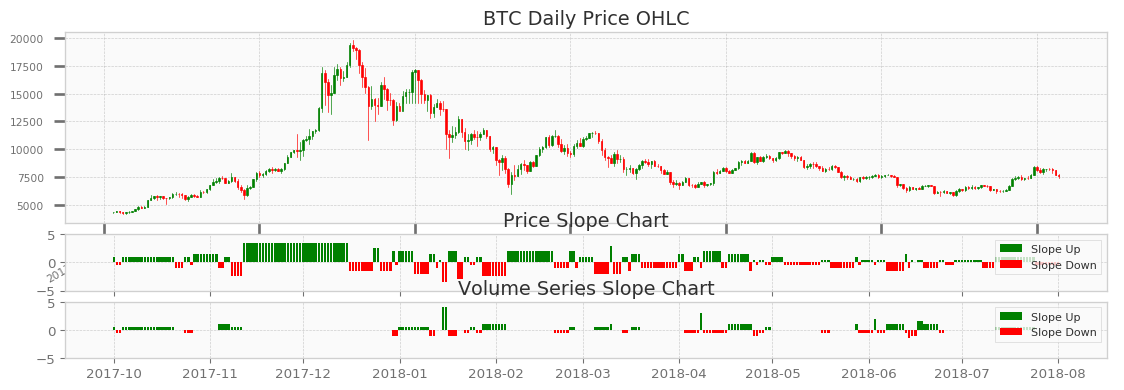

In [122]:
fig(14, 5)
_z = slice('2017-10-01', '2018-08-01')
subplot(51, 1, rowspan=3);
ohlc_plot(bcd_bar[_z], width=0.5)
plt.title('BTC Daily Price OHLC')

subplot(51, 4, rowspan=1); 
pn_bars(price_slp[_z])
plt.ylim([-5, 5]); plt.title('Price Slope Chart'); plt.legend();

subplot(51, 5, rowspan=1); 
pn_bars(series_slp[_z])
plt.ylim([-5, 5]); plt.title('Volume Series Slope Chart'); plt.legend();

Top plot is OHLC chart, next is calculated normilized Price Slope (+5 for very fast growing intervals and -5 for 'falling knife' periods).
Last one contains slopes calculated on compared series (volumes)

Now it's ready to find if there is any 'casuality' between 'predicting' series and price trends.
First we combine slopes into one dataframe. It looks like that:

In [148]:
combined_lagged = pd.concat((price_slp0, series_slp0.shift(1)), axis=1, keys=['price', 'series']).dropna()
combined_lagged.head()

,price,series
2017-01-01,0.0,4.0
2017-01-04,-2.0,0.0
2017-01-11,1.0,-0.0
2017-01-17,-1.0,-0.5
2017-01-18,0.5,-0.5


<strike>Correlation doesn't show significant dependency here:</strike>

On new fixed version we see correlation becomes to 25% (for period 2017 ... now)

In [169]:
combined_lagged.corr().iloc[0,1]

0.2558898741117077

Now we calculate frequency of observing particular slope A in price interval if predicting series had value B (actually that's frequency table) and plot it as heatmap

In [150]:
# columns - series
def calc_freq_table(df, col1, col2):
    ft = pd.DataFrame(np.zeros((21, 21)), columns=np.arange(-5, 5.5, 0.5), index=np.arange(-5, 5.5, 0.5))
    for r in df.iterrows():
        i, j = r[1][col1], r[1][col2]
        if np.isfinite(j):
            ft.loc[i, j] += 1
            
    return ft/ft.sum().sum()

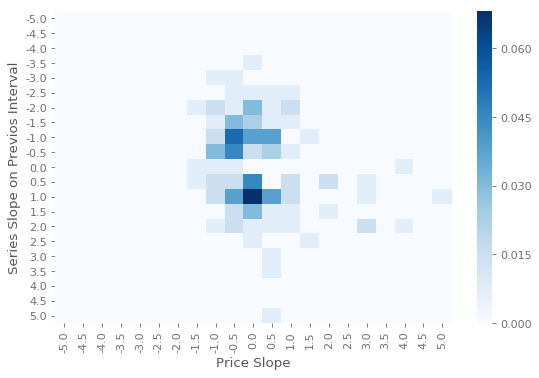

In [151]:
sns.heatmap(calc_freq_table(combined_lagged, 'price', 'series'), cmap='Blues')
plt.xlabel('Price Slope'); plt.ylabel('Series Slope on Previos Interval');

<strike>
From this frequency table we see that most likely pattern is following: 
 - small slopes (aka small changes in volume) peceding small changes in prices. That's actually just another expression of small correlation.
</strike>


Interesting observation here - that we can see 2 separated clouds of dots. Probably we could build classification models for separation. 

Next step we'll build scatter chart where we plot price slope against series slopes. Red dots - where price slope was negative and green dots for positive slopes.

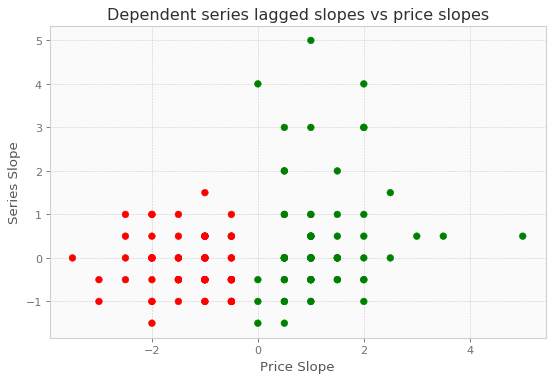

In [152]:
plt.scatter(combined_lagged.price, combined_lagged.series, c=['g' if p >= 0 else 'r' for p in combined_lagged.price])
plt.xlabel('Price Slope'); plt.ylabel('Series Slope')
plt.title('Dependent series lagged slopes vs price slopes');

We see that price directions are grouped and can be easily separated.

# Further investigation

Let's complete this study. We're going to review all available historical series from blockchain.com and see if there any predicting impact to price series.



<font color='red'>Update: slope correlation coefficients are added on charts</font>

In [171]:
def investigate_casuality(d, p_series, r0='2015-01-01', r1='2050-01-01', pcntg=0.2):
    rng_dates = slice(r0, r1)

    x = d[rng_dates].close
    y = d[rng_dates][p_series].fillna(0)

    trends = find_movements(x, threshold=np.inf, t_window=np.inf, pcntg=pcntg, drop_weekends_crossings=False, silent=True, result_as_frame=True)

    price_slp, price_slp0 = intervals_slopes(x, trends)
    series_slp, series_slp0 = intervals_slopes(y, trends)

    combined_lagged = pd.concat((price_slp0, series_slp0.shift(1)), axis=1, keys=['price', 'series']).dropna()
    sns.heatmap(calc_freq_table(combined_lagged, 'price', 'series'), cmap="Blues")
    cor_c = combined_lagged.corr().iloc[0,1]
    plt.xlabel('Price Slope. Corr.: %.02f' % cor_c); plt.ylabel('[%s] slope' % p_series);

We will use historical data and build frequency tables for following series:


 - Previos price action [close](https://www.blockchain.com/en/charts/market-price)
 - Volume [volume](https://www.blockchain.com/en/charts/trade-volume)
 - Transaction per day [tr_per_day](https://www.blockchain.com/en/charts/n-transactions)
 - Number of unique addresses [uniq_addr](https://www.blockchain.com/en/charts/n-unique-addresses)
 - Output volume [outvolume](https://www.blockchain.com/en/charts/output-volume)
 - Estimated transaction volume (in USD)[e_tr_volume_usd](https://www.blockchain.com/en/charts/estimated-transaction-volume-usd)
 - Estimated transaction volume [e_tr_vol](https://www.blockchain.com/en/charts/estimated-transaction-volume)
 

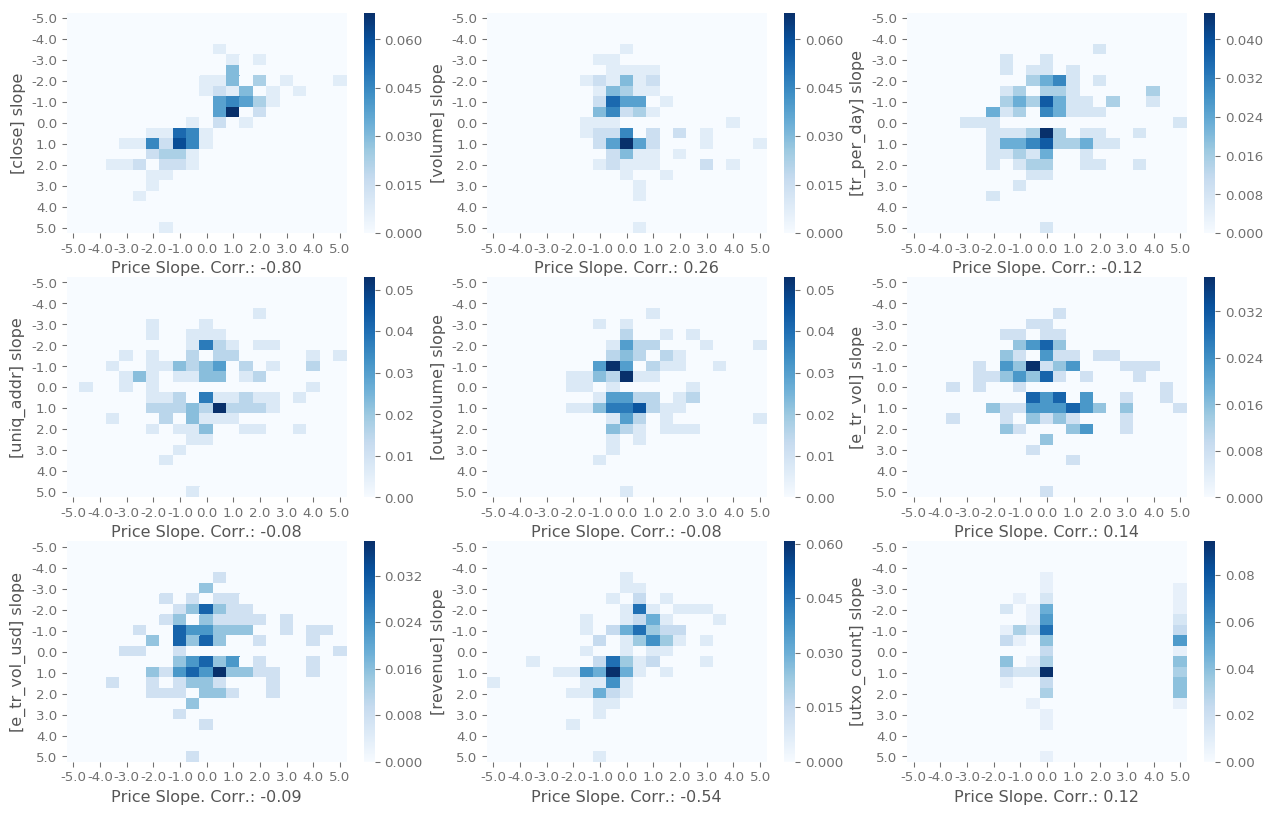

In [172]:
fig(16, 10)
_i = 1

def _run_i(p):
    global _i
    subplot(33, _i)
    _i += 1
    investigate_casuality(bcd, p, '2017-01-01', '2019-01-01', 0.2)
    
[_run_i(p) for p in ['close', 'volume', 'tr_per_day', 'uniq_addr', 'outvolume', 'e_tr_vol', 'e_tr_vol_usd', 'revenue', 'utxo_count']];

We see that most interesting case is that _probably_ previous slope of price series, revenue and estimated traded volume might give good predictors for forecasting.

## Reversal points closeness hypothesys

Another observation is following: if we look at unique_adresses and try to answer following question: `How often do we see uniq_adress extremum appears near price reversal point ?`

In [156]:
prices = bcd['2018-04-01':].close
ser1 = bcd['2018-04-01':].uniq_addr
i_drops, i_grows, _, _ = find_movements(prices, threshold=10, t_window=np.inf, pcntg=0.01, drop_weekends_crossings=False)

 -[:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::]-


Text(0.5,1,'Unique Adresses and Price reversal points')

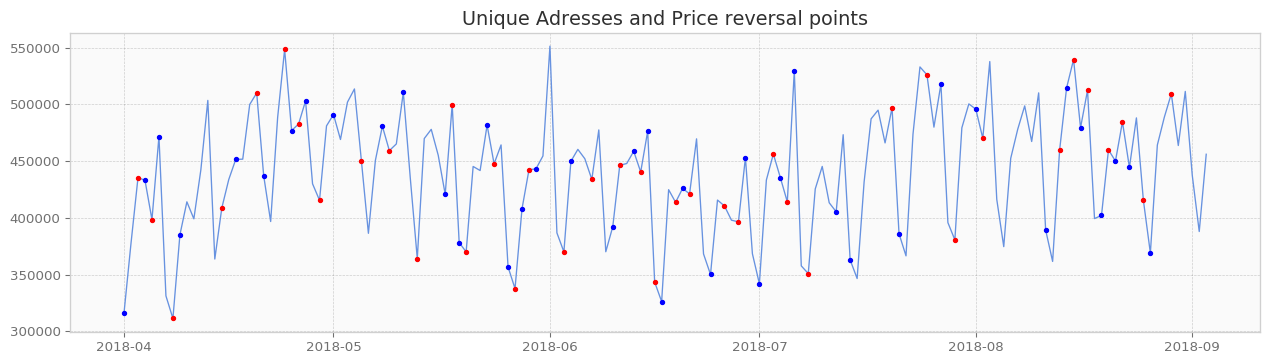

In [157]:
fig(16, 4)
plt.plot(ser1)
plt.plot(ser1.index[i_grows[:,0]], ser1[i_grows[:,0]], 'b.')
plt.plot(ser1.index[i_drops[:,0]], ser1[i_drops[:,0]], 'r.')
plt.title('Unique Adresses and Price reversal points')

Red dots - where price reverses to falling, blue ones - price reverses to growing. 
Most interesting here is that we can say - unique_adresses experiences extremums near price reversal points. 

Now we split both 'predicting' series and price one into significant movements. We'd like to know how often reversal points in both series are close (in time) to each other ?

For that we will find distance (in days) between closest reversal points from both series and build distribution of such distances. We compute appropriate distributions for all available series.

For each series we will build separated distributions for <font color='red'>'tops'</font> (where series changes it's direction from ascendant direction to descending) and for <font color='red'>'bottoms'</font> (from desc. to asc.) to see if there is any dependency. Left column contains top distributions and right one is for bottoms.

In [164]:
def plt_statistics(data, s1, s2, px=0.05, py=0.05):
    x, y = data[s1], data[s2]
    x_trends = find_movements(x, threshold=np.inf, t_window=np.inf, pcntg=px, drop_weekends_crossings=False, result_as_frame=True, silent=True)
    y_trends = find_movements(y, threshold=np.inf, t_window=np.inf, pcntg=py, drop_weekends_crossings=False, result_as_frame=True, silent=True)

    x_top, x_bot = x_trends.UpTrends.dropna().index, x_trends.DownTrends.dropna().index
    y_top, y_bot = y_trends.UpTrends.dropna().index, y_trends.DownTrends.dropna().index
    
    def _min_sig(x, t):
        d = x - t
        return d[np.argmin(abs(d))].days

    subplot(12, 1); 
    s1 = 'Price' if s1 == 'close' else s1
    plt.title("Top reversal of '%s'" % s2)
    plt.hist([_min_sig(x_top, t) for t in y_top], 50,  color='#a00010', label="Days to nearest '%s' top" % s1);
    plt.hist([_min_sig(x_bot, t) for t in y_top], 100, color='#308010', label="Days to nearest '%s' bottom" % s1);
    plt.xlabel('Distance in days')
    plt.legend(loc=1)
    
    subplot(12, 2); 
    plt.title("Bottom reversal of '%s'" % s2)
    plt.hist([_min_sig(x_top, t) for t in y_bot], 50,  color='#a00010', label="Days to nearest '%s' bottom" % s1);
    plt.hist([_min_sig(x_bot, t) for t in y_bot], 100, color='#308010', label="Days to nearest '%s' top" % s1);
    plt.xlabel('Distance in days')
    plt.legend(loc=1)

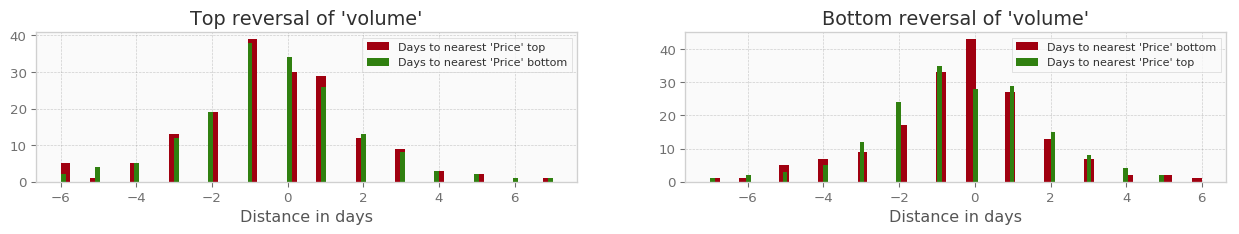

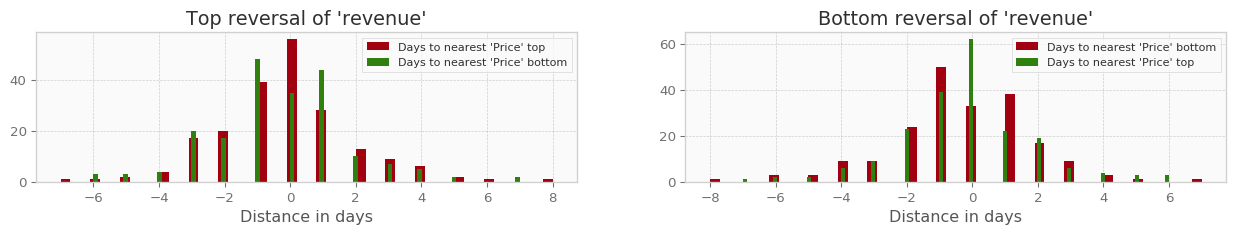

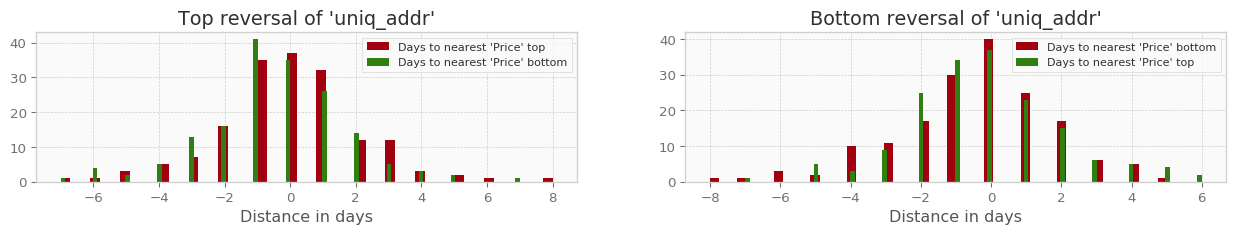

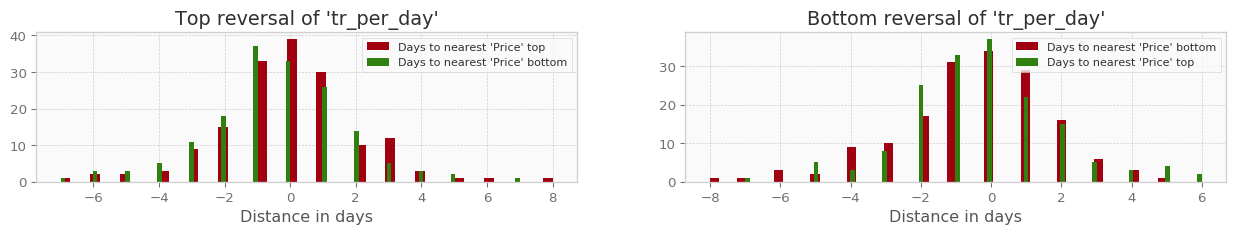

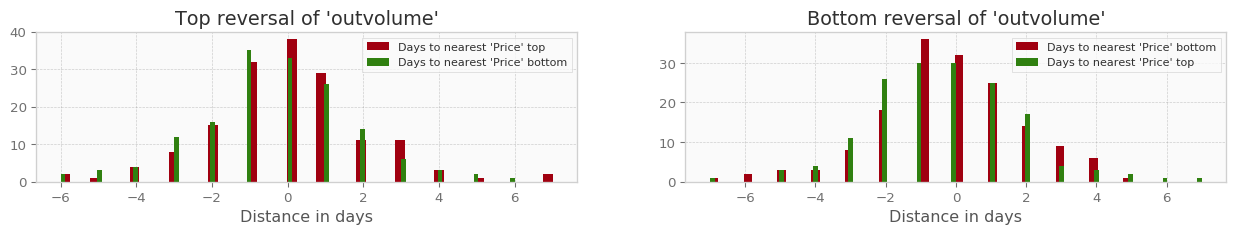

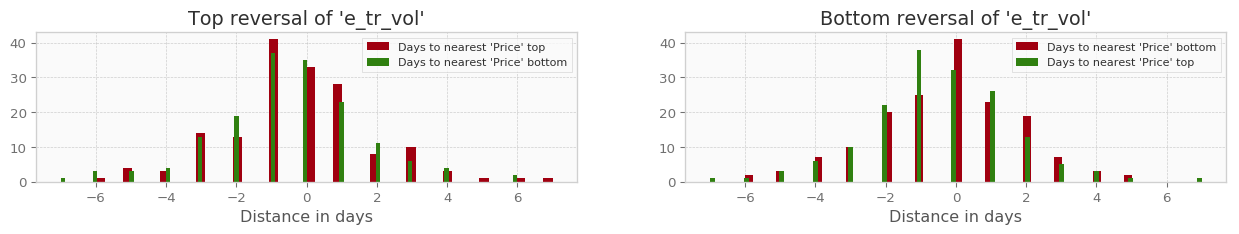

In [165]:
for ss in ['volume', 'revenue', 'uniq_addr', 'tr_per_day', 'outvolume', 'e_tr_vol']:
    fig(16, 2)
    plt_statistics(bcd['2017-01-01' : '2019-01-01'], 'close', ss, 0.05, 0.05)

Here negative 'Distance in days' means that we observe series reversal point at N days prior to nearest price reversal point and positive - N days after.
Another words:  'Distance in days' == -1 means that if we observe rev. point in series today price will revert it's direction tomorrow.

For instance if we consider 'Volume' series we find that tops in Volume series happened more frequently at the day before price reversal (left chart). But Volume's 'Bottoms' observed more frequently at the days when price also reverted (right chart).

Main conclusion: we could use these aux series reversal points as additional predictors in forecasting models along with slopes.

# Next steps [04/09/2018]

1. Integrating google trends series (I'm wotking on utility for fetching any google trends data on daily basis and reconstructing normalization)
2. Switch to bitcoinity data (+ additional series like market capitalization etc).
3. Build simple classification predictive model (just to see statistics of different features)